In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy import stats

from sklearn. impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
import sklearn.metrics as metrics

# 1. Data Loading

In [2]:
dataset = pd.read_csv('datasets/data.csv')
# link dataset: https://www.kaggle.com/datasets/shree1992/housedata?datasetId=46927
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# 2. Data Understanding

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

### Deskripsi variabel:
- date: tanggal dibuatnya data
- price: harga rumah dalam dolar Amerika Serikat (USD)
- bedrooms: jumlah kamar tidur 
- bathrooms: junlah kamar mandi
- sqft_living: luas tempat tinggal / rumah dalam satuan kaki persegi
- sqft_lot: luas tanah dalam satuan kaki persegi
- floors: ukuran lantai 
- waterfront: varibel kategorik apakah rumah dekat tepi laut atau tidak
- view: varibel kategorik apakah rumah memiliki view bagus atau tidak
- condition: varibel kategorik tentang kondisi rumah, semakin besar angka maka semakin bagus kondisinya
- sqft_above: luas atap dalam satuan kaki persegi
- sqft_basement: luas basement dalam satuan kaki persegi
- yr_built: tahun pembangunan rumah
- yr_renovate: tahun renovasi rumah
- street: alamat rumah
- city: kota lokasi rumah
- statezip: kodepos
- country: negara

In [4]:
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


bisa dilihat pada hasil data describe diatas didapat informasi:
- terdapat kolom yang tidak tercantum dalam tabel diatas merupakan kolom yang tidak relevan terhadap dataset seperti kolom date dan country sehingga akan dihapus.
- kolom statezip tidak terlihat dalam informasi diatas karena merupakan variabel kategorik. Untuk mengatasinya akan dilakukan proses onehotencoding nanti.

## Hapus kolom yang tidak relevan
Penghapusan kolom ini dilakukan karena kolom - kolom tersebut nantinya tidak akan digunakan dalam permodelan ML sehingga pilihan satu - satunya hanya menghapus kolom tersebut.

In [5]:
dataset.drop(['date', 'street', 'city', 'country'], axis = 1, inplace = True)
dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,WA 98133
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,WA 98119
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,WA 98042
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,WA 98008
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,WA 98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,WA 98133
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,WA 98007
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,WA 98059
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,WA 98178


## Mendeteksi data duplikasi dan missing value

In [6]:
duplicate_rows_dataset = dataset[dataset.duplicated()]
print("number of duplicate rows: ", duplicate_rows_dataset.shape)

number of duplicate rows:  (0, 14)


In [7]:
print(dataset.isnull().sum())

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
statezip         0
dtype: int64


Didapat informasi bahwa dataset tidak memiliki missing value ataupun duplikasi.

## Mengatasi nilai outlier pada data

<AxesSubplot:xlabel='sqft_living'>

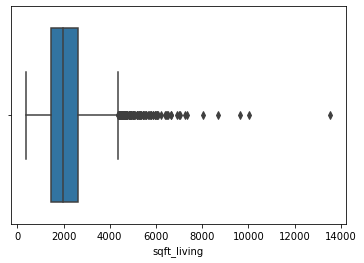

In [8]:
sns.boxplot(x=dataset['sqft_living'])

<AxesSubplot:xlabel='sqft_lot'>

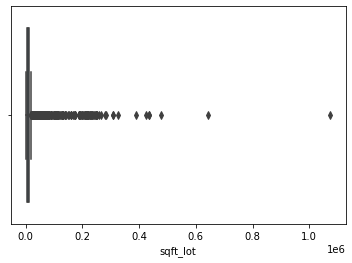

In [9]:
sns.boxplot(x=dataset['sqft_lot'])

<AxesSubplot:xlabel='sqft_above'>

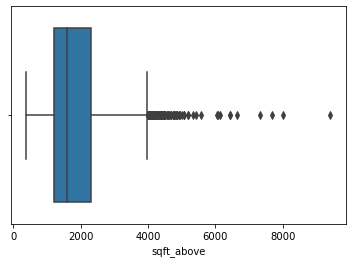

In [10]:
sns.boxplot(x=dataset['sqft_above'])

<AxesSubplot:xlabel='sqft_basement'>

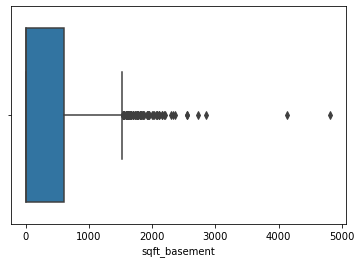

In [11]:
sns.boxplot(x=dataset['sqft_basement'])

Didapat informasi bahwa terdapat nilai outliers pada dataset. Seltman dalam “Experimental Design and Analysis” menyatakan bahwa outliers yang diidentifikasi oleh boxplot (disebut juga “boxplot outliers”) didefinisikan sebagai data yang nilainya 1.5 QR di atas Q3 atau 1.5 QR di bawah Q1. Jadi kita akan Kita akan menggunakan implementasi ini untuk menghilangkan nilai outlier pada baris yang memiliki nilai dibawah 1.5Q1 atau diatas 1.5Q3. 

In [12]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR=Q3-Q1
dataset=dataset[~((dataset<(Q1-1.5*IQR))|(dataset>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
dataset.shape

C:\Users\ASUS\AppData\Local\Temp/ipykernel_3980/1840165555.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dataset=dataset[~((dataset<(Q1-1.5*IQR))|(dataset>(Q3+1.5*IQR))).any(axis=1)]


(3448, 14)

## Univariate Analysis

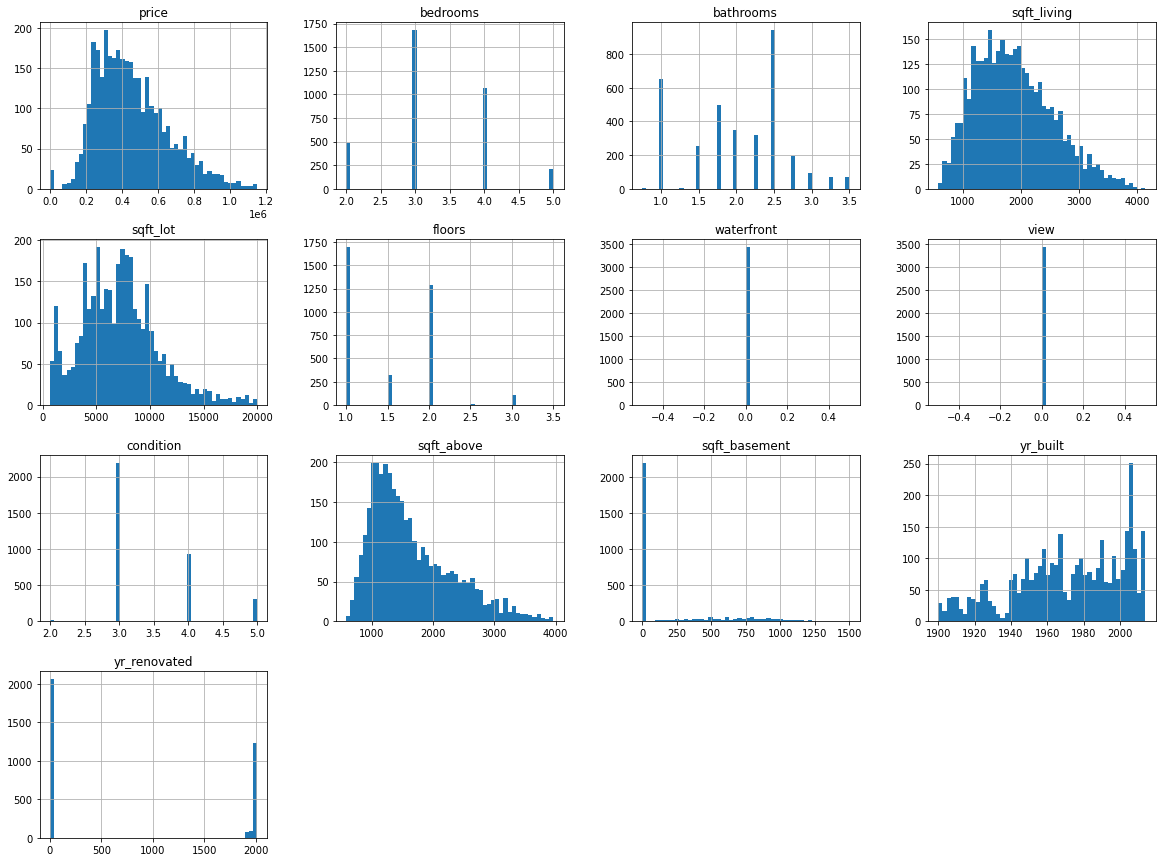

In [13]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

## Analisis Multivariate

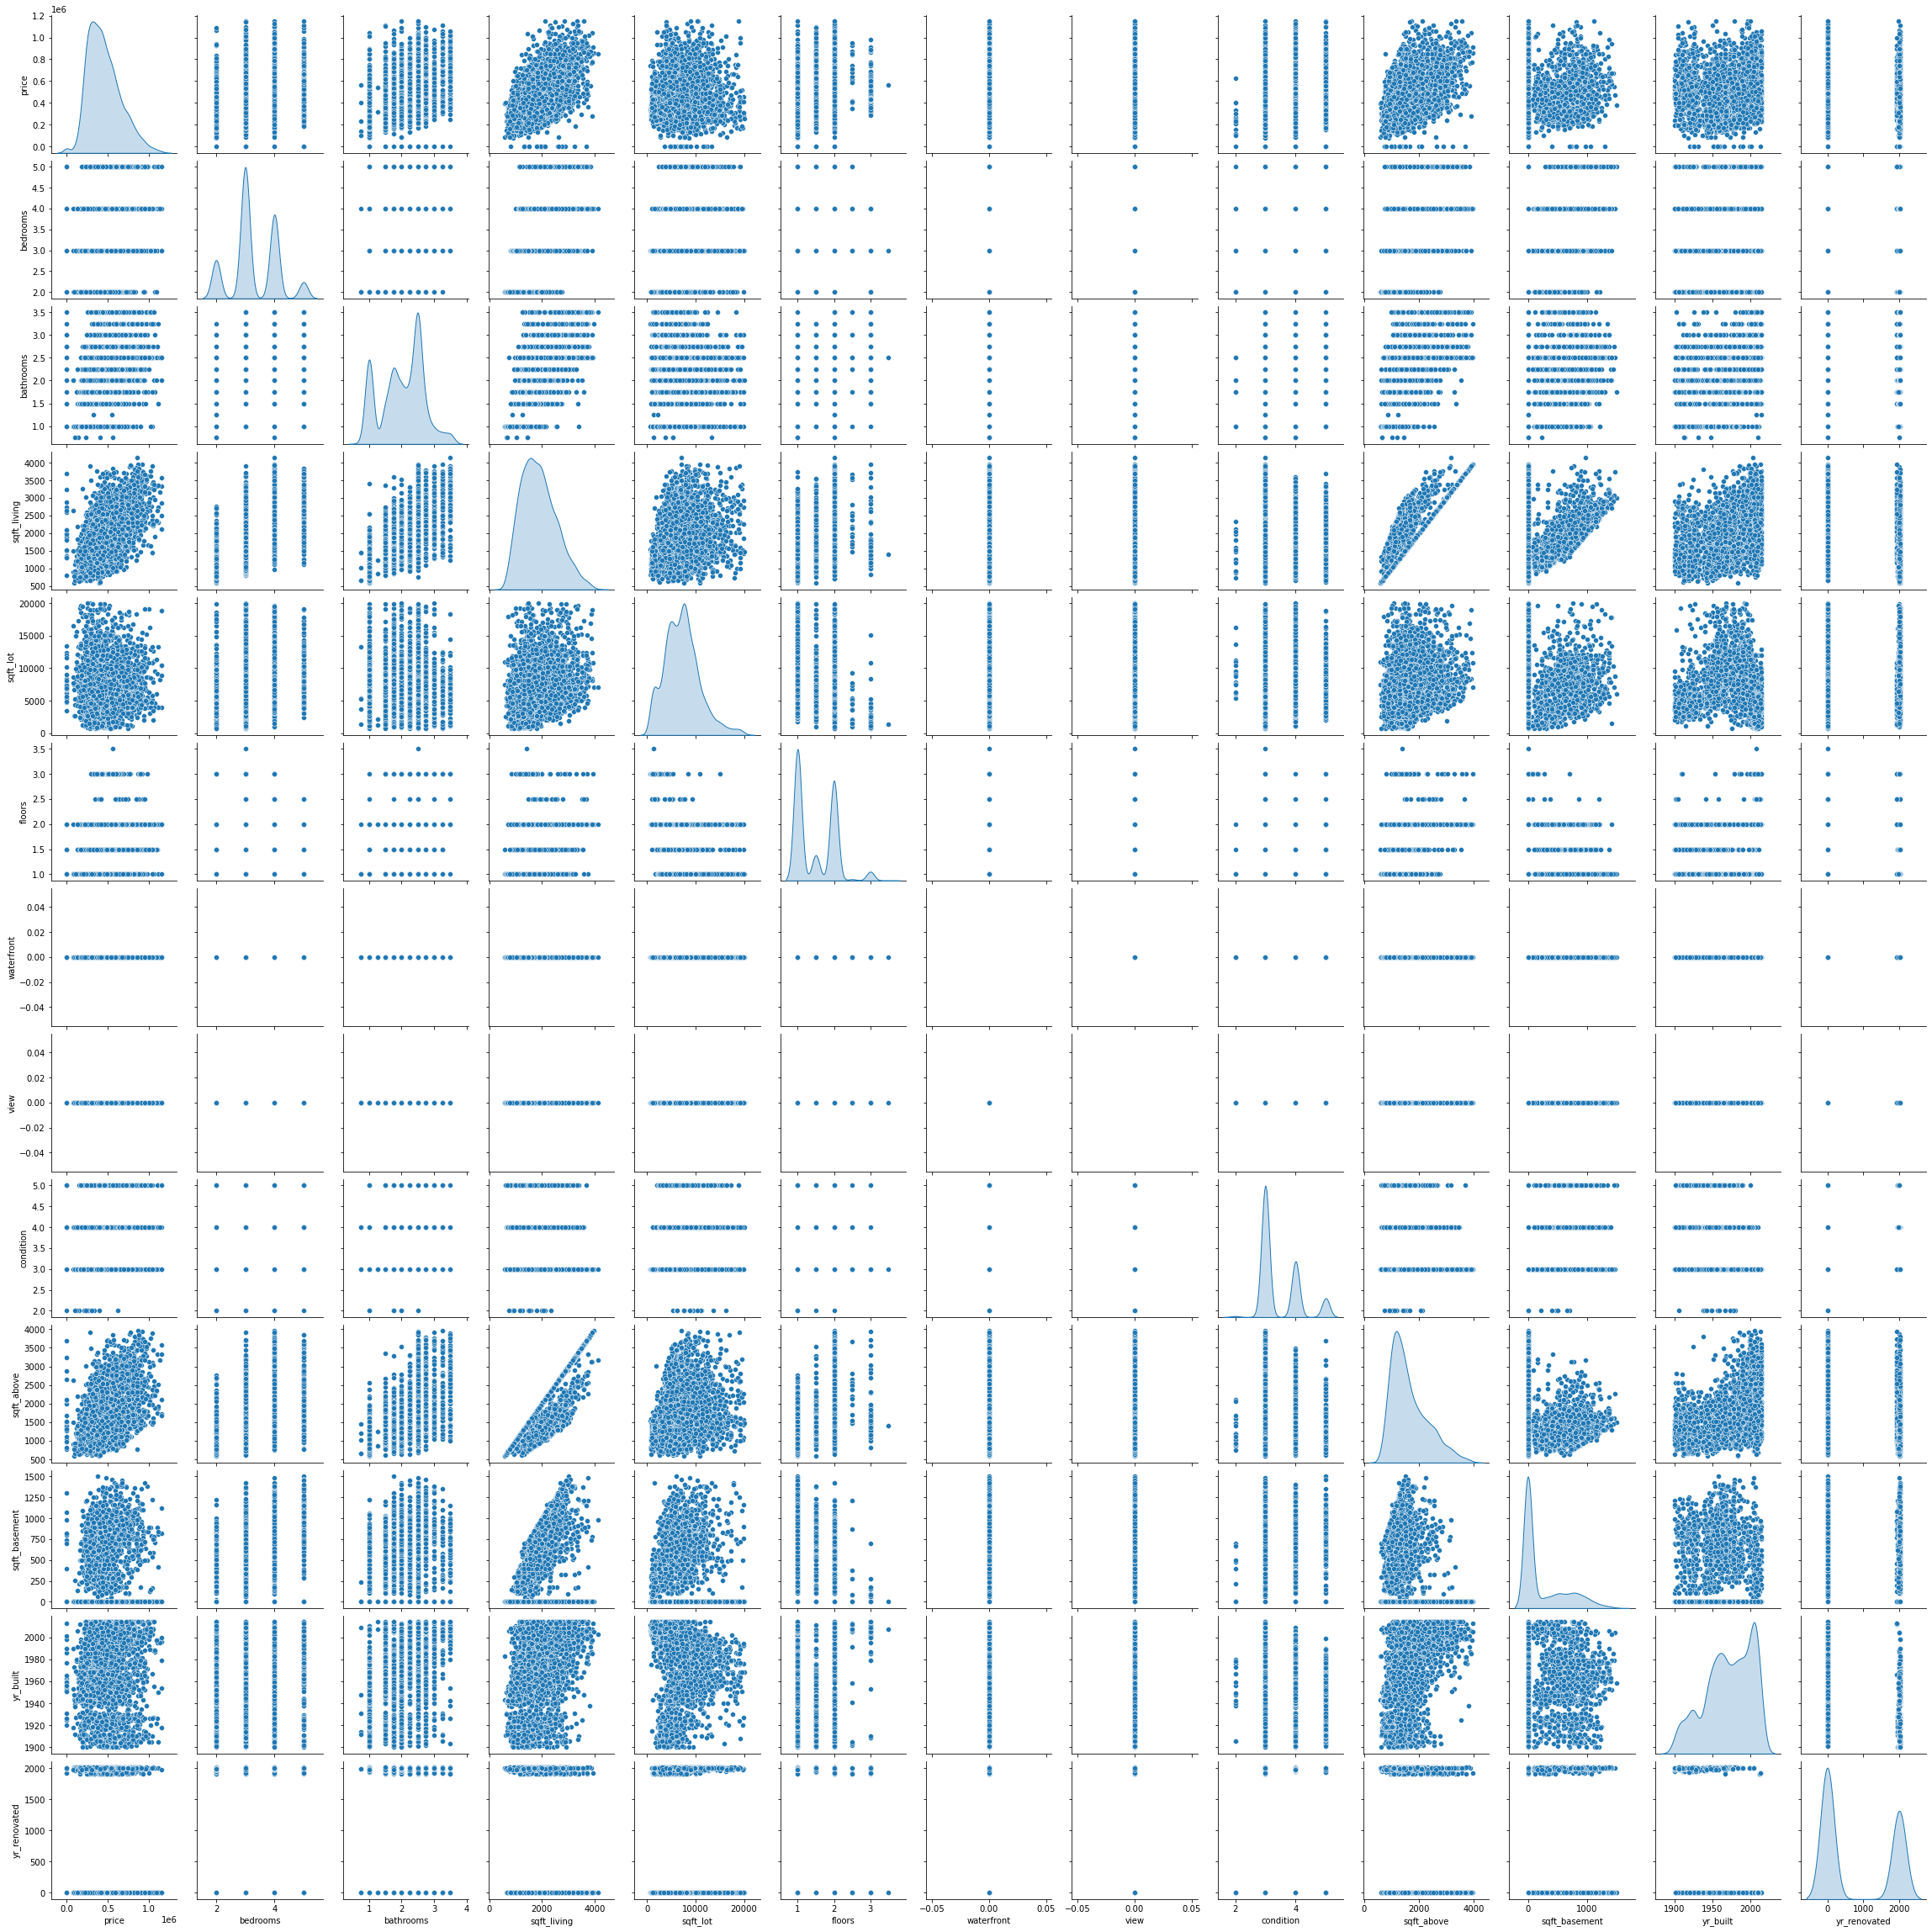

In [14]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(dataset, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur')

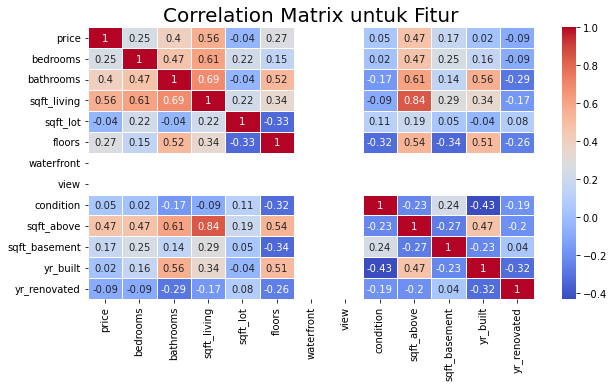

In [15]:
plt.figure(figsize=(10,5))
c= dataset.corr().round(2)
sns.heatmap(c, cmap='coolwarm', linewidths=0.5, annot=True)
plt.title("Correlation Matrix untuk Fitur", size=20)

Berdasarkan hasil analisis univariate dan multivariate, didapatkan informasi sebagai berikut:
- fitur kategorik waterfront dan view tidak relevan terhadap dataset sehingga bisa dihapus
- fitur yang memiliki pengaruh paling besar terhadap harga yaitu fitur sqft_living(luas rumah satuan kaki persegi)

In [16]:
dataset.drop(['waterfront', 'view'], axis = 1, inplace = True)
dataset

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,313000.000000,3.0,1.50,1340,7912,1.5,3,1340,0,1955,2005,WA 98133
2,342000.000000,3.0,2.00,1930,11947,1.0,4,1930,0,1966,0,WA 98042
3,420000.000000,3.0,2.25,2000,8030,1.0,4,1000,1000,1963,0,WA 98008
4,550000.000000,4.0,2.50,1940,10500,1.0,4,1140,800,1976,1992,WA 98052
5,490000.000000,2.0,1.00,880,6380,1.0,3,880,0,1938,1994,WA 98115
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3.0,1.75,1510,6360,1.0,4,1510,0,1954,1979,WA 98133
4596,534333.333333,3.0,2.50,1460,7573,2.0,3,1460,0,1983,2009,WA 98007
4597,416904.166667,3.0,2.50,3010,7014,2.0,3,3010,0,2009,0,WA 98059
4598,203400.000000,4.0,2.00,2090,6630,1.0,3,1070,1020,1974,0,WA 98178


# 3. Data Preparation

## One Hot Encoding

In [17]:
dataset.statezip.value_counts()

WA 98103    129
WA 98117    120
WA 98052    117
WA 98115    115
WA 98133     90
           ... 
WA 98288      1
WA 98068      1
WA 98051      1
WA 98050      1
WA 98039      1
Name: statezip, Length: 77, dtype: int64

In [18]:
le = LabelEncoder()
dataset['statezip_encoded'] = le.fit_transform(dataset.statezip)
dataset.head()

C:\Users\ASUS\AppData\Local\Temp/ipykernel_3980/2997380948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['statezip_encoded'] = le.fit_transform(dataset.statezip)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip,statezip_encoded
0,313000.0,3.0,1.50,1340,7912,1.5,3,1340,0,1955,2005,WA 98133,62
2,342000.0,3.0,2.00,1930,11947,1.0,4,1930,0,1966,0,WA 98042,26
3,420000.0,3.0,2.25,2000,8030,1.0,4,1000,1000,1963,0,WA 98008,7
4,550000.0,4.0,2.50,1940,10500,1.0,4,1140,800,1976,1992,WA 98052,31
5,490000.0,2.0,1.00,880,6380,1.0,3,880,0,1938,1994,WA 98115,54


In [19]:
dataset.statezip_encoded.value_counts()

47    129
56    120
31    117
54    115
62     90
     ... 
75      1
39      1
30      1
29      1
24      1
Name: statezip_encoded, Length: 77, dtype: int64

In [20]:
dataset.drop(['statezip'], axis = 1, inplace = True)
dataset.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip_encoded
0,313000.0,3.0,1.50,1340,7912,1.5,3,1340,0,1955,2005,62
2,342000.0,3.0,2.00,1930,11947,1.0,4,1930,0,1966,0,26
3,420000.0,3.0,2.25,2000,8030,1.0,4,1000,1000,1963,0,7
4,550000.0,4.0,2.50,1940,10500,1.0,4,1140,800,1976,1992,31
5,490000.0,2.0,1.00,880,6380,1.0,3,880,0,1938,1994,54


## Train Test Split 

In [21]:
X = dataset.drop(["price"],axis =1)
y = dataset["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [22]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 3448
Total # of sample in train dataset: 2758
Total # of sample in test dataset: 690


## StandardScaler

In [23]:
numerical_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'statezip_encoded']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,sqft_living,sqft_lot,sqft_above,sqft_basement,statezip_encoded
2366,-1.354073,-0.425629,-1.002121,-0.648110,0.846025
3750,-0.699111,-0.217463,-1.091931,0.701196,0.701555
2669,-0.267432,0.093952,0.090566,-0.648110,-1.032087
2215,-0.207890,-0.994190,-1.032058,1.483793,0.846025
3287,-0.520485,0.471879,-0.987153,0.836126,0.460771


In [24]:
X_train[numerical_features].describe().round(4)

,sqft_living,sqft_lot,sqft_above,sqft_basement,statezip_encoded
count,2758.0000,2758.0000,2758.0000,2758.0000,2758.0000
mean,0.0000,0.0000,-0.0000,-0.0000,-0.0000
std,1.0002,1.0002,1.0002,1.0002,1.0002
min,-1.9346,-1.8127,-1.5859,-0.6481,-1.8989
25%,-0.7587,-0.6819,-0.7477,-0.6481,-0.8395
50%,-0.1037,-0.0263,-0.2836,-0.6481,0.1237
75%,0.6517,0.5636,0.5845,0.6742,0.8460
max,3.3646,3.5543,3.4734,3.3998,1.7610


# 4. Model Development

In [25]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['LinearRegression', 'kNN', 'RandomForest_B', 'RandomForest_A'])
models

,LinearRegression,kNN,RandomForest_B,RandomForest_A
train_mse,NaN,NaN,NaN,NaN
test_mse,NaN,NaN,NaN,NaN


## Linear Regression

In [26]:
LR = LinearRegression()
LR.fit(X_train, y_train)

models.loc['train_mse','LinearRegression'] = mean_squared_error(y_pred = LR.predict(X_train), y_true=y_train)

## KNN

In [27]:
knn = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='euclidean')
knn.fit(X_train, y_train)
 
models.loc['train_mse','kNN'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [28]:
models

,LinearRegression,kNN,RandomForest_B,RandomForest_A
train_mse,22389371092.245834,1018536.983321,NaN,NaN
test_mse,NaN,NaN,NaN,NaN


## Random Forest

In [29]:
 # buat model prediksi
RF_B = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF_B.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest_B'] = mean_squared_error(y_pred=RF_B.predict(X_train), y_true=y_train)

In [30]:
models

,LinearRegression,kNN,RandomForest_B,RandomForest_A
train_mse,22389371092.245834,1018536.983321,2522848805.611086,NaN
test_mse,NaN,NaN,NaN,NaN


## Hyperparameter Tuning Random Forest

In [31]:
param_grid = [
    {'n_estimators': [3, 10, 30, 50, 70, 100], 'max_depth': [4, 8, 12, 16]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 30, 50], 'max_depth': [4, 6, 8]},
]

forest_reg_gs = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg_gs, param_grid, cv=5,
                           scoring='neg_root_mean_squared_error',
                           return_train_score=True,
                           verbose=2,)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ........................max_depth=4, n_estimators=3; total time=   0.0s
[CV] END ........................max_depth=4, n_estimators=3; total time=   0.0s
[CV] END ........................max_depth=4, n_estimators=3; total time=   0.0s
[CV] END ........................max_depth=4, n_estimators=3; total time=   0.0s
[CV] END ........................max_depth=4, n_estimators=3; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=30; total time=   0.1s
[CV] END .......................max_depth=4, n_

[CV] END ......................max_depth=16, n_estimators=30; total time=   0.8s
[CV] END ......................max_depth=16, n_estimators=30; total time=   0.7s
[CV] END ......................max_depth=16, n_estimators=30; total time=   0.7s
[CV] END ......................max_depth=16, n_estimators=30; total time=   0.8s
[CV] END ......................max_depth=16, n_estimators=50; total time=   1.3s
[CV] END ......................max_depth=16, n_estimators=50; total time=   1.2s
[CV] END ......................max_depth=16, n_estimators=50; total time=   1.0s
[CV] END ......................max_depth=16, n_estimators=50; total time=   1.1s
[CV] END ......................max_depth=16, n_estimators=50; total time=   1.0s
[CV] END ......................max_depth=16, n_estimators=70; total time=   1.3s
[CV] END ......................max_depth=16, n_estimators=70; total time=   1.3s
[CV] END ......................max_depth=16, n_estimators=70; total time=   1.2s
[CV] END ...................

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [4, 8, 12, 16],
                          'n_estimators': [3, 10, 30, 50, 70, 100]},
                         {'bootstrap': [False], 'max_depth': [4, 6, 8],
                          'n_estimators': [3, 10, 30, 50]}],
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [32]:
grid_search.best_params_

{'max_depth': 16, 'n_estimators': 100}

In [33]:
RF_A = RandomForestRegressor(n_estimators=100, max_depth=16, random_state=55, n_jobs=-1)
RF_A.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest_A'] = mean_squared_error(y_pred=RF_A.predict(X_train), y_true=y_train)

# 5. Model Evaluation

In [34]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [35]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['LR','KNN','RF_B', 'RF_A'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'LR': LR, 'KNN': knn, 'RF_B': RF_B, 'RF_A': RF_A}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse

,train,test
LR,22389371.092246,25245050.576271
KNN,1018.536983,31245753.131294
RF_B,2522848.805611,16462608.343122
RF_A,2464636.558426,16662822.220243


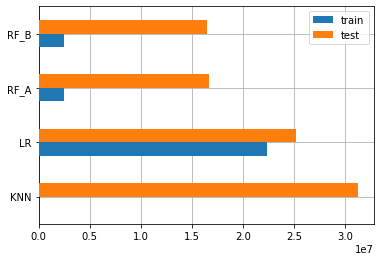

In [36]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [38]:
prediksi = X_test.iloc[:3].copy()
pred_dict = {'y_true':y_test[:3]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_LR,prediksi_KNN,prediksi_RF_B,prediksi_RF_A
2629,235000.0,315775.3,315584.5,273357.3,274196.4
2324,545000.0,457072.8,624910.4,505404.8,512606.1
1708,366000.0,358429.2,343651.3,423304.1,421730.9
